<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 125.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 127.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 149.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [6]:
# Step 1: Identify duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {duplicates}")

# Step 2: Remove duplicate rows
df = df.drop_duplicates()

# Step 3: Verify removal
duplicates_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicates_after}")

# Check the new dataset shape
print(f"Dataset shape after removing duplicates: {df.shape}")


Number of duplicate rows in the dataset: 0
Number of duplicate rows after removal: 0
Dataset shape after removing duplicates: (65437, 114)


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [13]:
# Count missing values in CodingActivities column
missing_coding = df['CodingActivities'].isnull().sum()
print(f"Number of missing values in 'CodingActivities': {missing_coding}")


Number of missing values in 'CodingActivities': 10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [15]:
# Forward-fill imputation
df['CodingActivities'] = df['CodingActivities'].ffill()

# Verify again
missing_after = df['CodingActivities'].isnull().sum()
print(f"Number of missing values in 'CodingActivities' after imputation: {missing_after}")


Number of missing values in 'CodingActivities' after imputation: 0


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [16]:
# Find compensation-related columns
comp_cols = [col for col in df.columns if 'Comp' in col or 'Salary' in col]
print(f"Compensation-related columns found: {comp_cols}")


Compensation-related columns found: ['CompTotal', 'AIComplex', 'ConvertedCompYearly']


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [17]:
# Step 1: Min-Max Normalization
min_comp = df['ConvertedCompYearly'].min()
max_comp = df['ConvertedCompYearly'].max()

# Create a new column with normalized values
df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - min_comp) / (max_comp - min_comp)

# Step 2: Check the result
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())

# Step 3: Verify min and max of normalized column
print(f"Min of normalized column: {df['ConvertedCompYearly_MinMax'].min()}")
print(f"Max of normalized column: {df['ConvertedCompYearly_MinMax'].max()}")


   ConvertedCompYearly  ConvertedCompYearly_MinMax
0                  NaN                         NaN
1                  NaN                         NaN
2                  NaN                         NaN
3                  NaN                         NaN
4                  NaN                         NaN
Min of normalized column: 0.0
Max of normalized column: 1.0


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [18]:
# Step 1: Calculate mean and standard deviation
mean_comp = df['ConvertedCompYearly'].mean()
std_comp = df['ConvertedCompYearly'].std()

# Step 2: Apply Z-score normalization
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean_comp) / std_comp

# Step 3: Check the result
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head())

# Step 4: Verify mean and std of the normalized column
print(f"Mean of Z-score column: {df['ConvertedCompYearly_Zscore'].mean():.2f}")
print(f"Standard deviation of Z-score column: {df['ConvertedCompYearly_Zscore'].std():.2f}")


   ConvertedCompYearly  ConvertedCompYearly_Zscore
0                  NaN                         NaN
1                  NaN                         NaN
2                  NaN                         NaN
3                  NaN                         NaN
4                  NaN                         NaN
Mean of Z-score column: 0.00
Standard deviation of Z-score column: 1.00


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


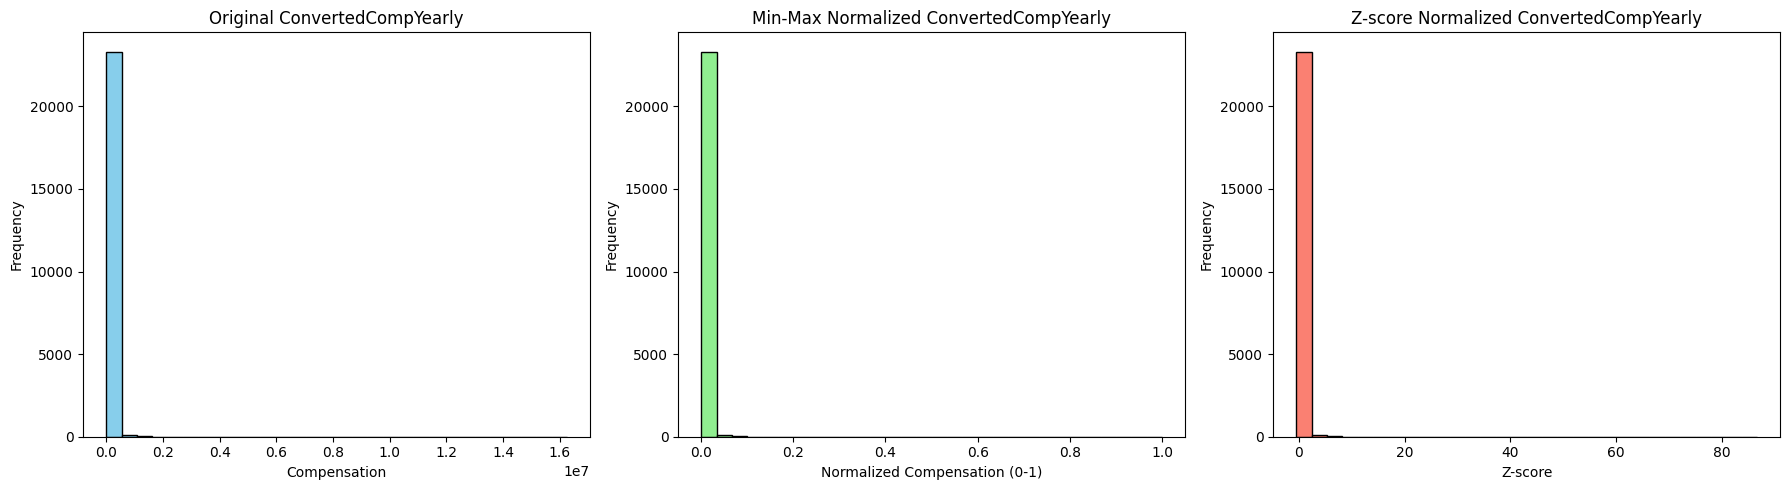

In [19]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(18,5))

# Histogram 1: Original ConvertedCompYearly
plt.subplot(1,3,1)
plt.hist(df['ConvertedCompYearly'], bins=30, color='skyblue', edgecolor='black')
plt.title("Original ConvertedCompYearly")
plt.xlabel("Compensation")
plt.ylabel("Frequency")

# Histogram 2: Min-Max Normalized
plt.subplot(1,3,2)
plt.hist(df['ConvertedCompYearly_MinMax'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Min-Max Normalized ConvertedCompYearly")
plt.xlabel("Normalized Compensation (0-1)")
plt.ylabel("Frequency")

# Histogram 3: Z-score Normalized
plt.subplot(1,3,3)
plt.hist(df['ConvertedCompYearly_Zscore'], bins=30, color='salmon', edgecolor='black')
plt.title("Z-score Normalized ConvertedCompYearly")
plt.xlabel("Z-score")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
